In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
Data=pd.read_csv("ANN.csv",sep=";",decimal=",")
x=Data.drop(["y1","y2","y3"],axis=1).values
x = np.column_stack((x, np.ones(x.shape[0])*-1)) # Agregar los umbrales
y=Data.drop(["x1","x2"],axis=1).values
np.random.seed(10)

In [312]:
# Definición de la función de transferencia
def sigmoid ( x,deriv=False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

# Definición de los pesos iniciales

w0 = 2*np.random.random((2,3)) - 1 # Entrada-Oculta
w0 = np.row_stack((w0, np.ones(3)*-1))

w1=2*np.random.random((3,3))-1 # Oculta-Salida
a=[]
for i in range(2000):
    l0=x
    l1=sigmoid(np.dot(l0,w0))
    l2=sigmoid(np.dot(l1,w1))
    
    l2_error= y-l2
    
    if (i%100)==0:
        a.append(np.mean(np.abs(l2_error)))
        print(f'Error: {np.mean(np.abs(l2_error))}')
    l2_delta=l2_error*sigmoid(l2,deriv=True)
    
    # Contribución de L1 a L2
    
    l1_error=np.dot(l2_delta,w1)
    l1_delta=l1_error*sigmoid(l1,deriv=True)
    
    # Actualización de pesos
    
    w1+=np.dot(l1.T,l2_delta)
    w0+=np.dot(l0.T, l1_delta)

#print("Despúes de entrenar")
print(l2)

Error: 0.5384289455691005
Error: 0.12543503874253625
Error: 0.05520718646296228
Error: 0.039452708691981114
Error: 0.03200504922803759
Error: 0.027499675206775712
Error: 0.024417420201986676
Error: 0.02214583800678956
Error: 0.020385889727223532
Error: 0.018972463017884564
Error: 0.01780618136840741
Error: 0.016823275928260866
Error: 0.015980748070033184
Error: 0.015248435609133455
Error: 0.014604486801741617
Error: 0.014032639594497012
Error: 0.013520513740592432
Error: 0.01305849897153677
Error: 0.012639008362647117
Error: 0.01225596330481308
[[ 0.98872829  0.00673766  0.01623587]
 [ 0.990656    0.01512217  0.00606423]
 [ 0.00748385  0.98378285  0.01412232]
 [ 0.01850289  0.99342811  0.00574705]
 [ 0.0106472   0.01422635  0.98353256]
 [ 0.01016083  0.01362838  0.98421055]]


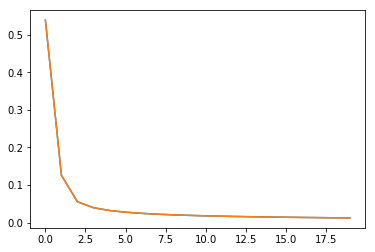

In [315]:
plt.plot(a)
plt.show()